In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import numpy as np
import random
from sklearn import preprocessing
from tensorflow.keras.regularizers import l2

# Settings the warnings to be ignored
import warnings  
warnings.filterwarnings('ignore') 

In [2]:
train_dir = '../data/training'
val_dir = '../data/validation'
testing_dir = '../data/testing'


In [3]:
img_width, img_height = 150, 150

In [4]:
epochs = 20
batch_size=32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1365 images belonging to 3 classes.
Found 235 images belonging to 3 classes.


In [7]:
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Flatten,
    Conv2D, MaxPooling2D
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001) ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
# minor moderate and severe (3)
model.add(Dense(3, activation='softmax'))

In [8]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.3599 - loss: 1.4922 - val_accuracy: 0.2681 - val_loss: 1.4994
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.3889 - loss: 1.4803 - val_accuracy: 0.4681 - val_loss: 1.4740
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.3810 - loss: 1.4770 - val_accuracy: 0.4809 - val_loss: 1.4719
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.4095 - loss: 1.4674 - val_accuracy: 0.4383 - val_loss: 1.4574
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.4305 - loss: 1.4546 - val_accuracy: 0.3872 - val_loss: 1.4972
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.4569 - loss: 1.4357 - val_accuracy: 0.4936 - val_loss: 1.4079
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 253ms/step - accuracy: 0.4781 - loss: 1.3989 - val_accuracy: 0.4596 - val_loss: 1.3992
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.4715 - loss: 1.3973 - val_accu

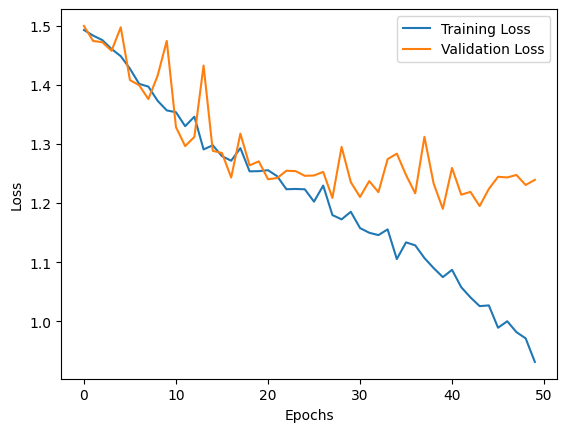

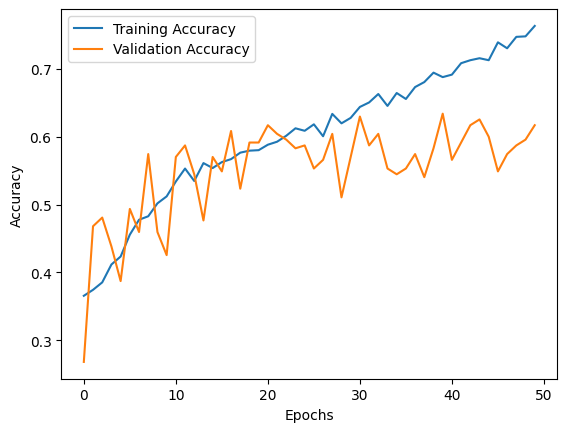

In [14]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import f1_score
# # f1 score
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Confusion Matrix:


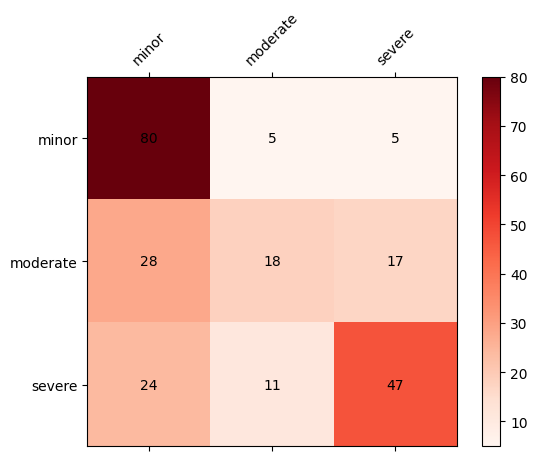

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.61      0.89      0.72        90
 02-moderate       0.53      0.29      0.37        63
   03-severe       0.68      0.57      0.62        82

    accuracy                           0.62       235
   macro avg       0.61      0.58      0.57       235
weighted avg       0.61      0.62      0.59       235



In [11]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)


from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()

report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)


In [12]:
model.save('damage_classification_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


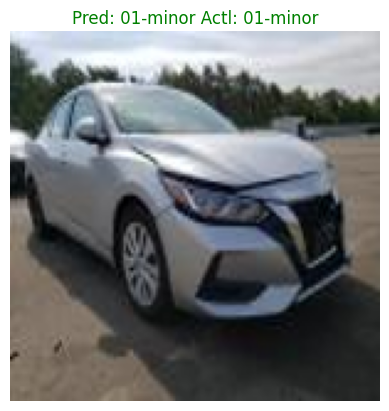

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


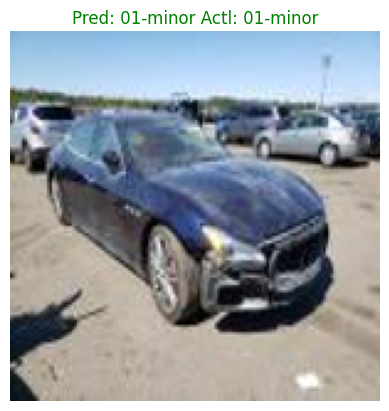

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


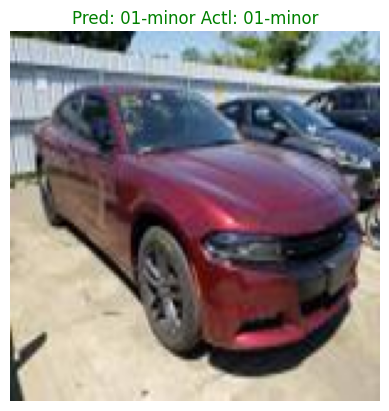

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


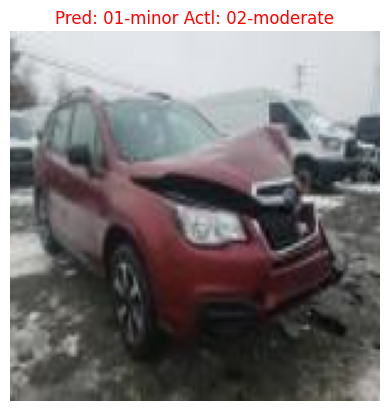

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


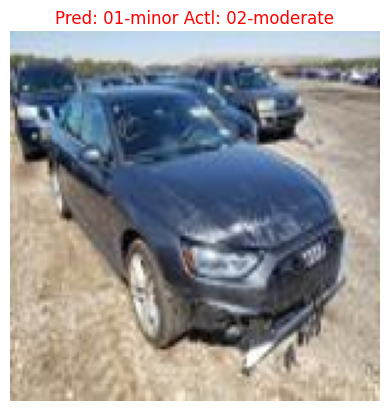

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


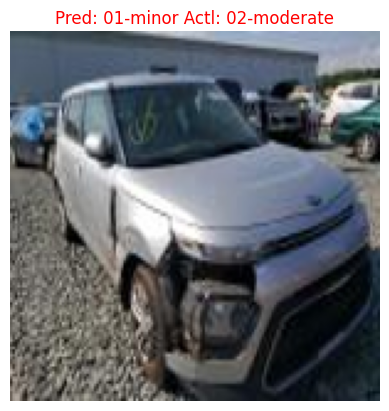

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


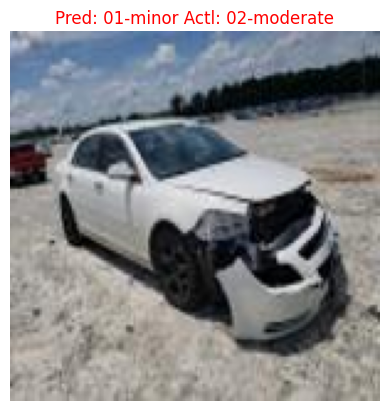

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


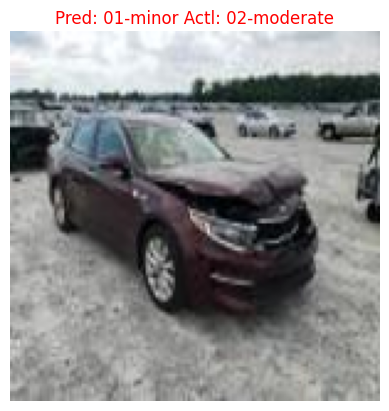

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


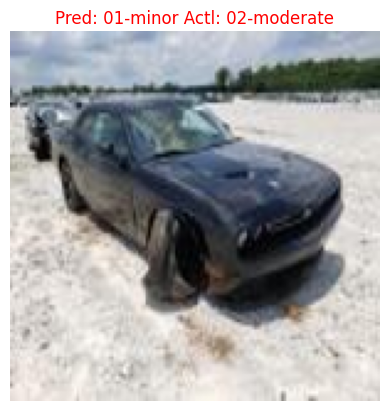

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


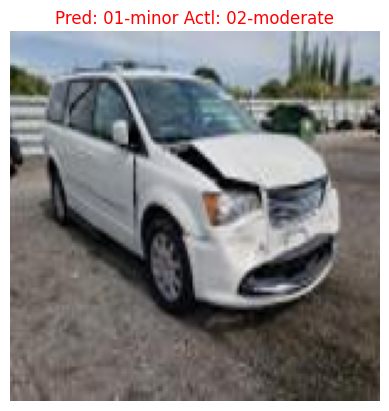

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


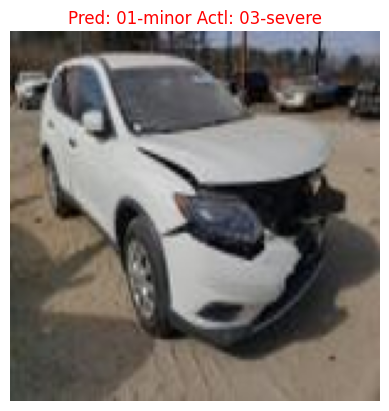

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


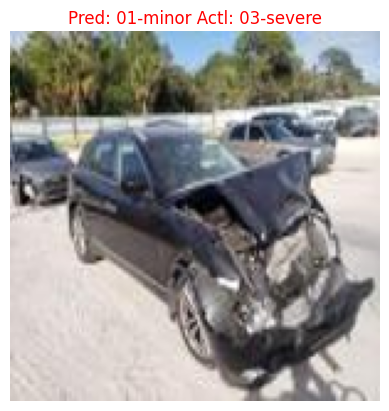

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


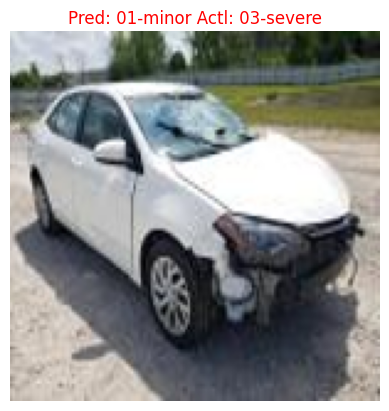

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


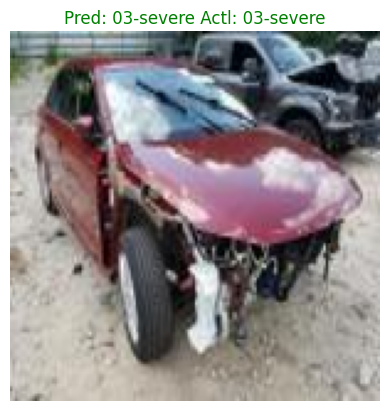

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


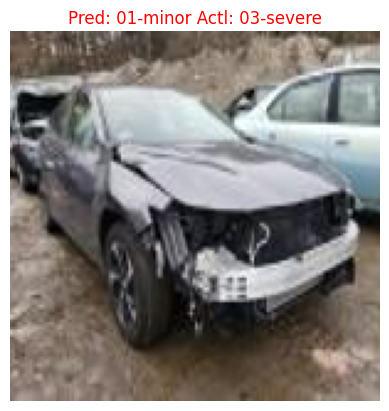

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


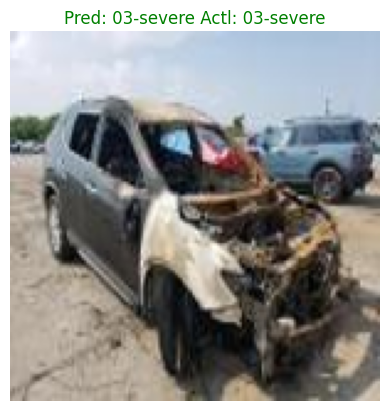

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


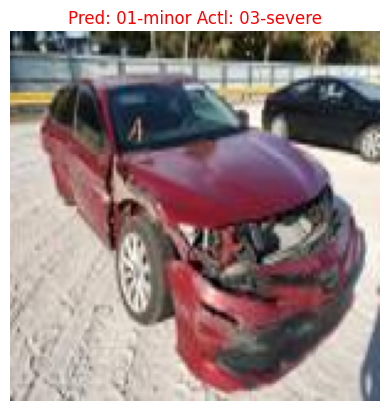

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


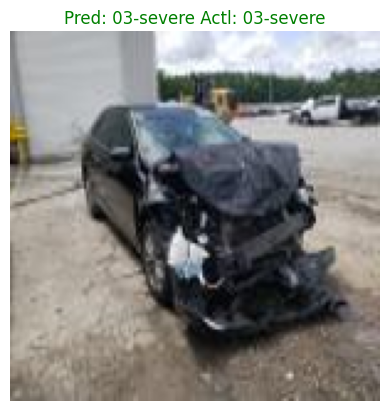

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


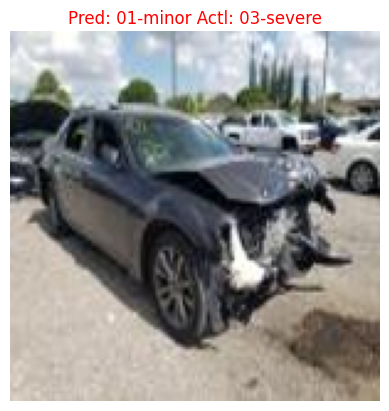

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


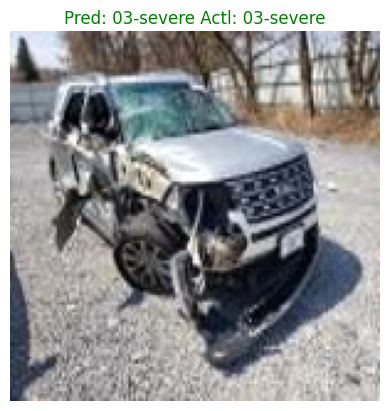

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


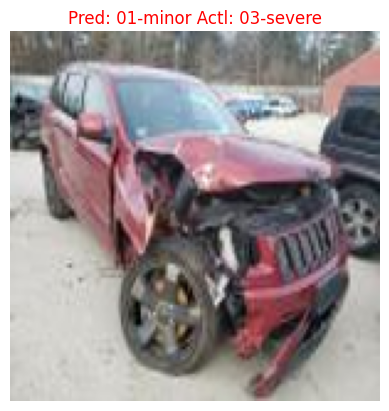

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


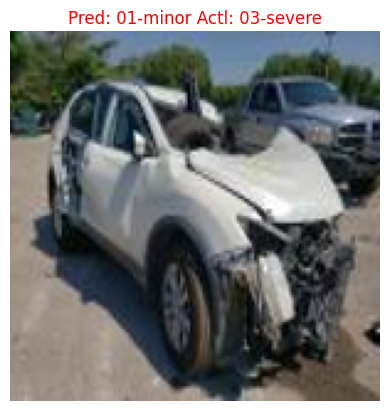

False: 15
True: 7


In [13]:
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(testing_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1

    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))